In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('leapGestRecog/00/'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count]=j
        count +=1
lookup

{'05_thumb': 0,
 '08_palm_moved': 1,
 '02_l': 2,
 '01_palm': 3,
 '07_ok': 4,
 '10_down': 5,
 '06_index': 6,
 '09_c': 7,
 '03_fist': 8,
 '04_fist_moved': 9}

In [3]:
x_data = []
y_data = []
datacount = 0
for i in range(0,10):
    for j in os.listdir('leapGestRecog/0'+str(i)+'/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('leapGestRecog/0'+str(i)+'/'+j+'/'):
                img = Image.open('leapGestRecog/0'+str(i)+'/'+j+'/'+k).convert('L')
                img = img.resize((320,120))
                arr = np.array(img)
                x_data.append(arr)
                count +=1
            y_values = np.full((count,1),lookup[j])
            y_data.append(y_values)
            datacount += count
x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount,1)
            


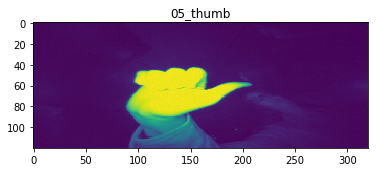

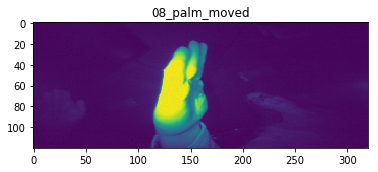

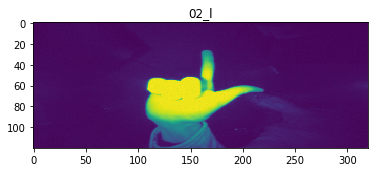

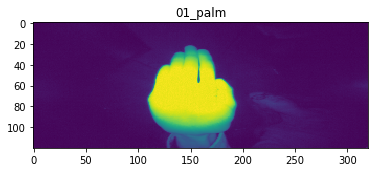

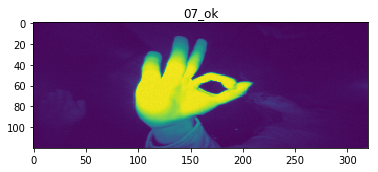

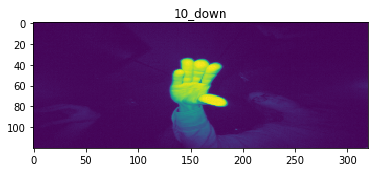

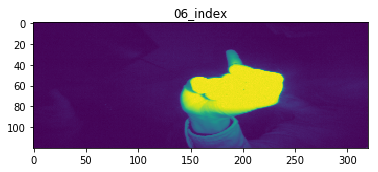

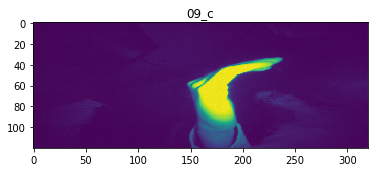

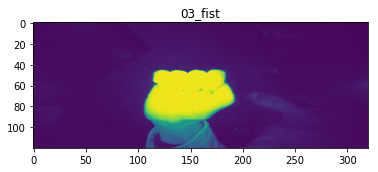

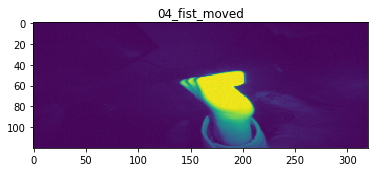

In [4]:
from random import randint
for i in range(0,10):
    plt.imshow(x_data[i*200,:,:])
    plt.title(reverselookup[y_data[i*200,0]])
    plt.show()

In [5]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

Using TensorFlow backend.


In [6]:
x_data = x_data.reshape((datacount,120,320,1))
x_data/=255

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size=0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size=0.5)

In [8]:
from keras import layers, models

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), strides=(2,2),activation='relu',input_shape=(120,320,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Train on 16000 samples, validate on 2000 samples
Epoch 1/10
16000/16000 [==============================] - 191s 12ms/step - loss: 0.2481 - acc: 0.9238 - val_loss: 0.0117 - val_acc: 0.9980
Epoch 2/10
16000/16000 [==============================] - 163s 10ms/step - loss: 0.0067 - acc: 0.9983 - val_loss: 0.0027 - val_acc: 0.9995
Epoch 3/10
16000/16000 [==============================] - 154s 10ms/step - loss: 0.0039 - acc: 0.9992 - val_loss: 1.8587e-05 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 161s 10ms/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0012 - val_acc: 0.9995
Epoch 5/10
16000/16000 [==============================] - 163s 10ms/step - loss: 0.0020 - acc: 0.9996 - val_loss: 4.5004e-04 - val_acc: 0.9995
Epoch 6/10
16000/16000 [==============================] - 166s 10ms/step - loss: 0.0025 - acc: 0.9996 - val_loss: 2.8144e-07 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 171s 11ms/step - loss: 0.0017 - acc: 0.9999 - v

In [11]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 8s 4ms/step
Accuracy:1.0


In [19]:
model.predict(x_test)

array([[0.0000000e+00, 8.4446659e-27, 1.0000000e+00, ..., 1.1026097e-21,
        2.6561545e-22, 0.0000000e+00],
       [9.2309471e-21, 0.0000000e+00, 6.1280409e-20, ..., 0.0000000e+00,
        1.0000000e+00, 4.3357023e-17],
       [1.0000000e+00, 0.0000000e+00, 1.3799144e-15, ..., 0.0000000e+00,
        1.1688415e-12, 0.0000000e+00],
       ...,
       [2.1423826e-12, 7.7678771e-27, 1.7729194e-16, ..., 1.6339429e-25,
        1.0000000e+00, 1.4883883e-22],
       [1.0000000e+00, 0.0000000e+00, 3.3992602e-35, ..., 1.4669965e-37,
        1.5315132e-26, 9.2657535e-24],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.0137806e-35,
        5.1892208e-30, 6.3130347e-31]], dtype=float32)

In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_pred.round())

0.9995

In [12]:
model.save("handmove.h5")